In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
#loading the data set in python env
df = pd.read_csv('wine.csv')
df.head() #reviewing before performing the EDA

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Exploratory Data Analysis**

### **Statistical Summary**

In [4]:
#information of the dataset to observe the data types, missing values,variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
#Statistical summary of the data set
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### **General Observations**

- A small data set considering there are only 178 entries ranges from 0-177.suggesting it is sample data from population.

- Type of classes in wine are 3 as it ranges from 1-3.with mean of 1.94 and std dev of 0.77.

- Alcohol %(probably) range in wine is from 11 - 14 which is normal but it seems the data is focused on unfortified wine with avg being 13% and having std dev of 0.80 means the spread is very low.

- Variable Malic might be represents the rate of the malice acid in winewhich ranges from 0.77-5.8 with avg of 2.33

- Ash content ranges from around 1-3 which is stable.while alcalinity(typo of alkalinity) ranges from 10 - 30 with big variance. it doesn't seem normal for wines cuz typically wine is acidic . alkalinity is measurement of pH value which effects taste,aroma,color etc.

- Magnesium means meneral content in wine ranges from 70-160 also not normal for wines.

- phenolic content(phenols,flavanoid,non flavanoids) are ranges between 0-6 but 75th percentile of each being 2.8,2.8,0.4 respectively suggests that they are normal compared to alkalinity and magnesium while also having some variance.

- Proanthocyanins&color rating(assuming) which brings color and quality to wine has a range between 0-4 and 1-13.

- Proline an ammino acid which helps to decide type of wine range from 270-1600 with avg of 740 and std of 300.

In [6]:
skewness = df.skew()
kurtosis = df.kurtosis()
stat_table = pd.DataFrame({'skewness':skewness,'kurtosis':kurtosis})
stat_table

,skewness,kurtosis
Type,0.107431,-1.322787
Alcohol,-0.051482,-0.852500
Malic,1.039651,0.299207
Ash,-0.176699,1.143978
Alcalinity,0.213047,0.487942
Magnesium,1.098191,2.104991
Phenols,0.086639,-0.835627
Flavanoids,0.025344,-0.880382
Nonflavanoids,0.450151,-0.637191
Proanthocyanins,0.517137,0.554649


### **From Skewness and Kurtosis**

***Skewness***

- Right-skewed with some high values - Malic(1.03) & Magnesium(1.09).

- Slightly right-skewed - Color(0.86)&Proline(0.76).

- Almost symmetric - Alcohol(-0.02),Flavanoids(0.02)&Hue(0.02).

- Left-skewed - Dilution(-0.30).

***Kurtosis***

- High kurtosis - Magnesium(2.10).

- Almost normal but Slightly peaked - Ash(1.14) and Proanthocyanins(0.55).

- Negative kurtosis - Most features like Alcohol, Phenols, Flavanoids, Dilution, Proline.

- Flat like kutosis - Type(-1.32) and Dilution(-1.09).

### **Data Visualization**

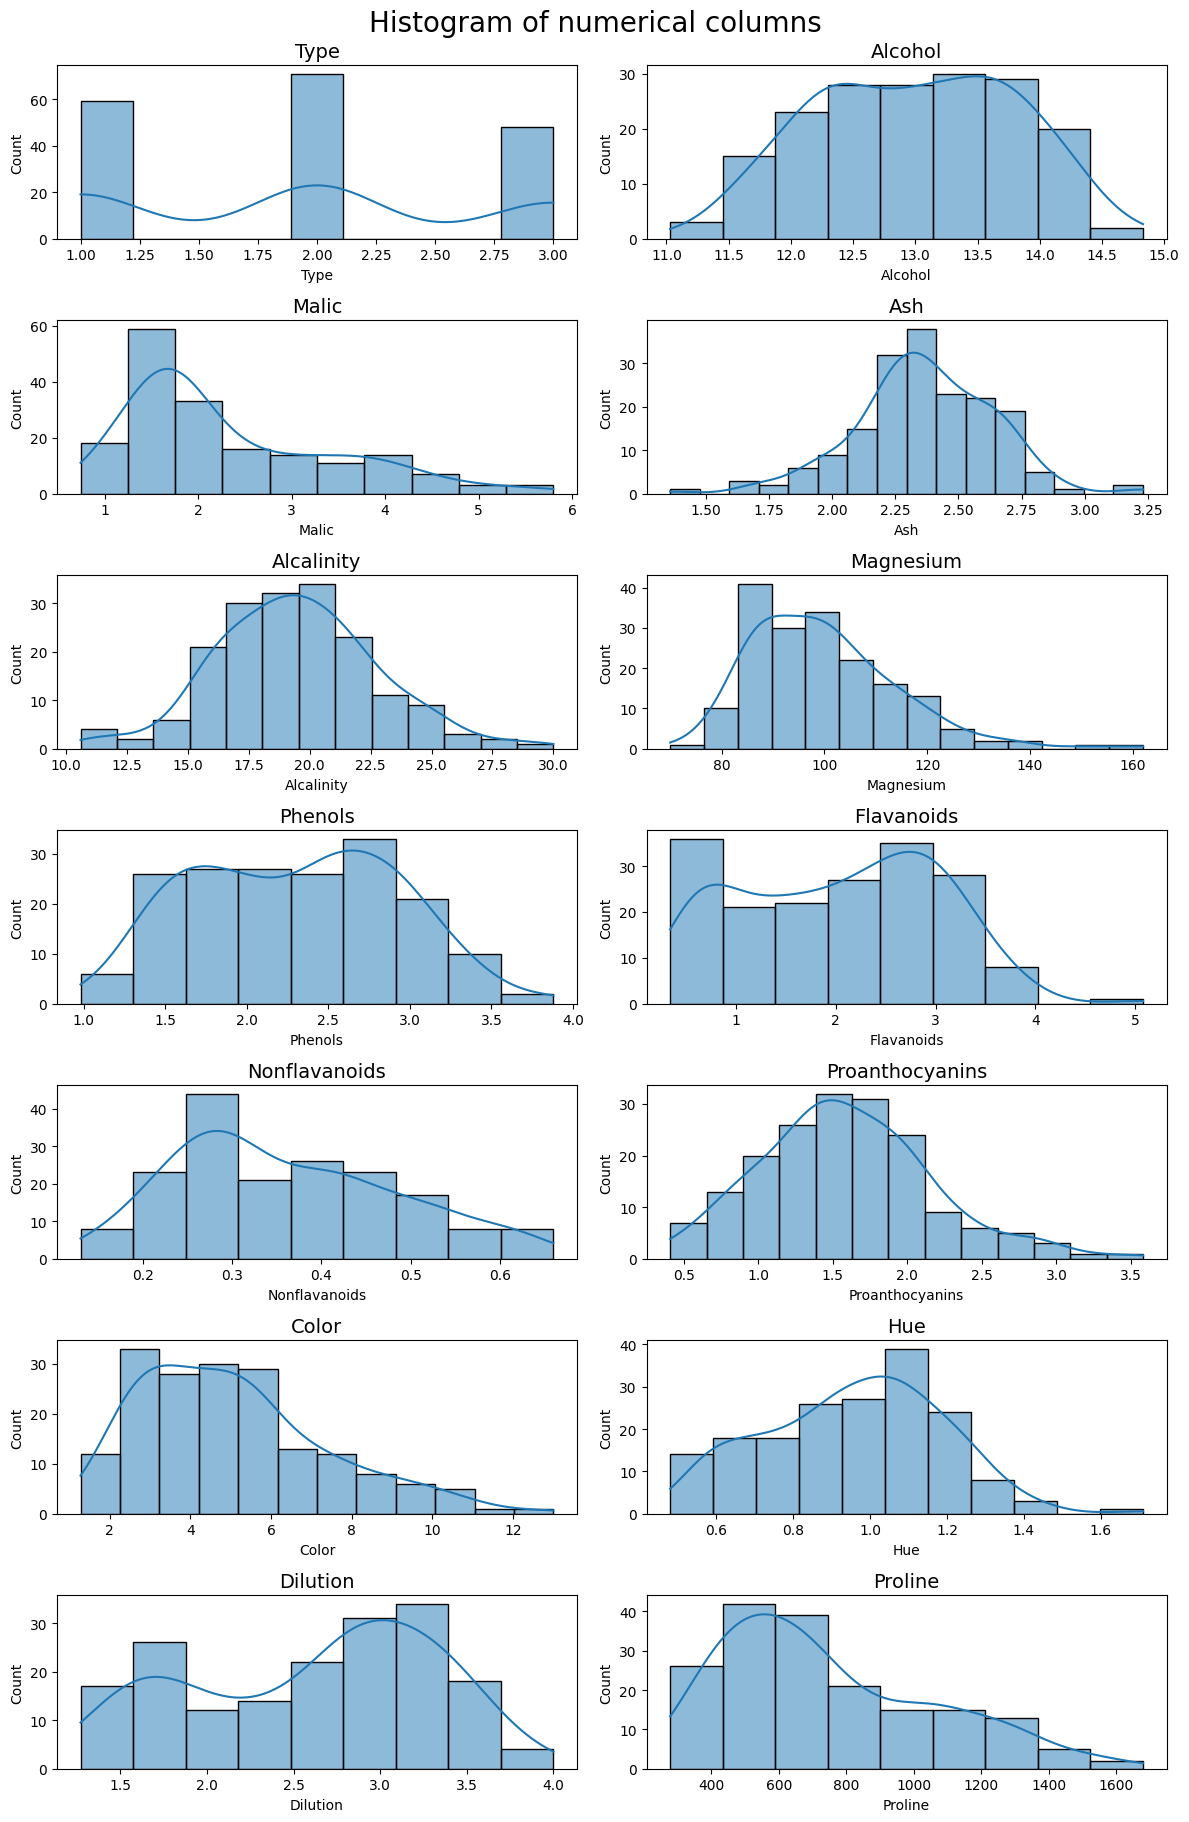

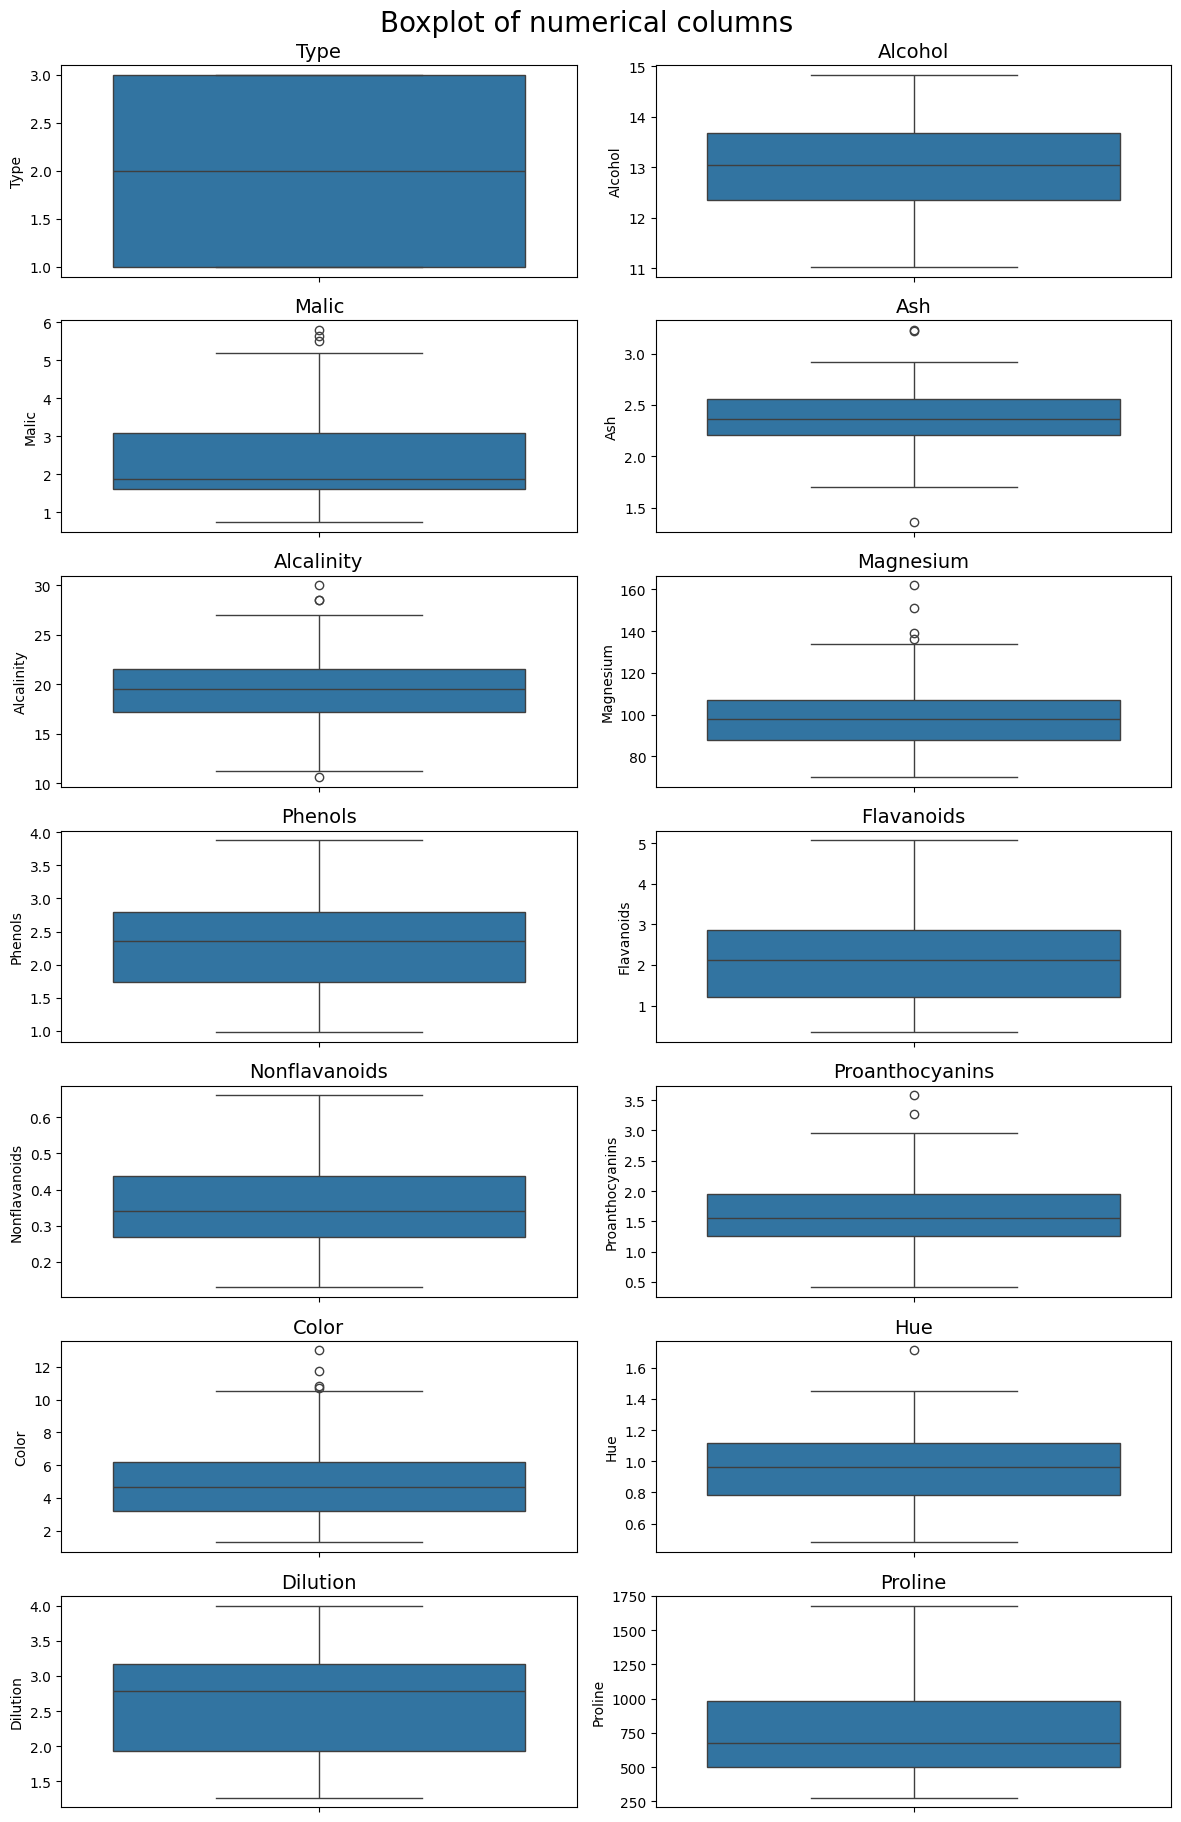

In [31]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

#Histograms of numerical columns
fig, axes = plt.subplots(7, 2, figsize=(12, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col,fontsize= 14)

plt.tight_layout()
plt.suptitle("Histogram of numerical columns",fontsize=20,y= 1.01)
plt.show()

#Boxplotting the numerical columns
fig, axes = plt.subplots(7, 2, figsize=(12, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col,fontsize= 14)

plt.tight_layout()
plt.suptitle("Boxplot of numerical columns",fontsize=20,y= 1.01)
plt.show()

<Figure size 1600x2800 with 0 Axes>

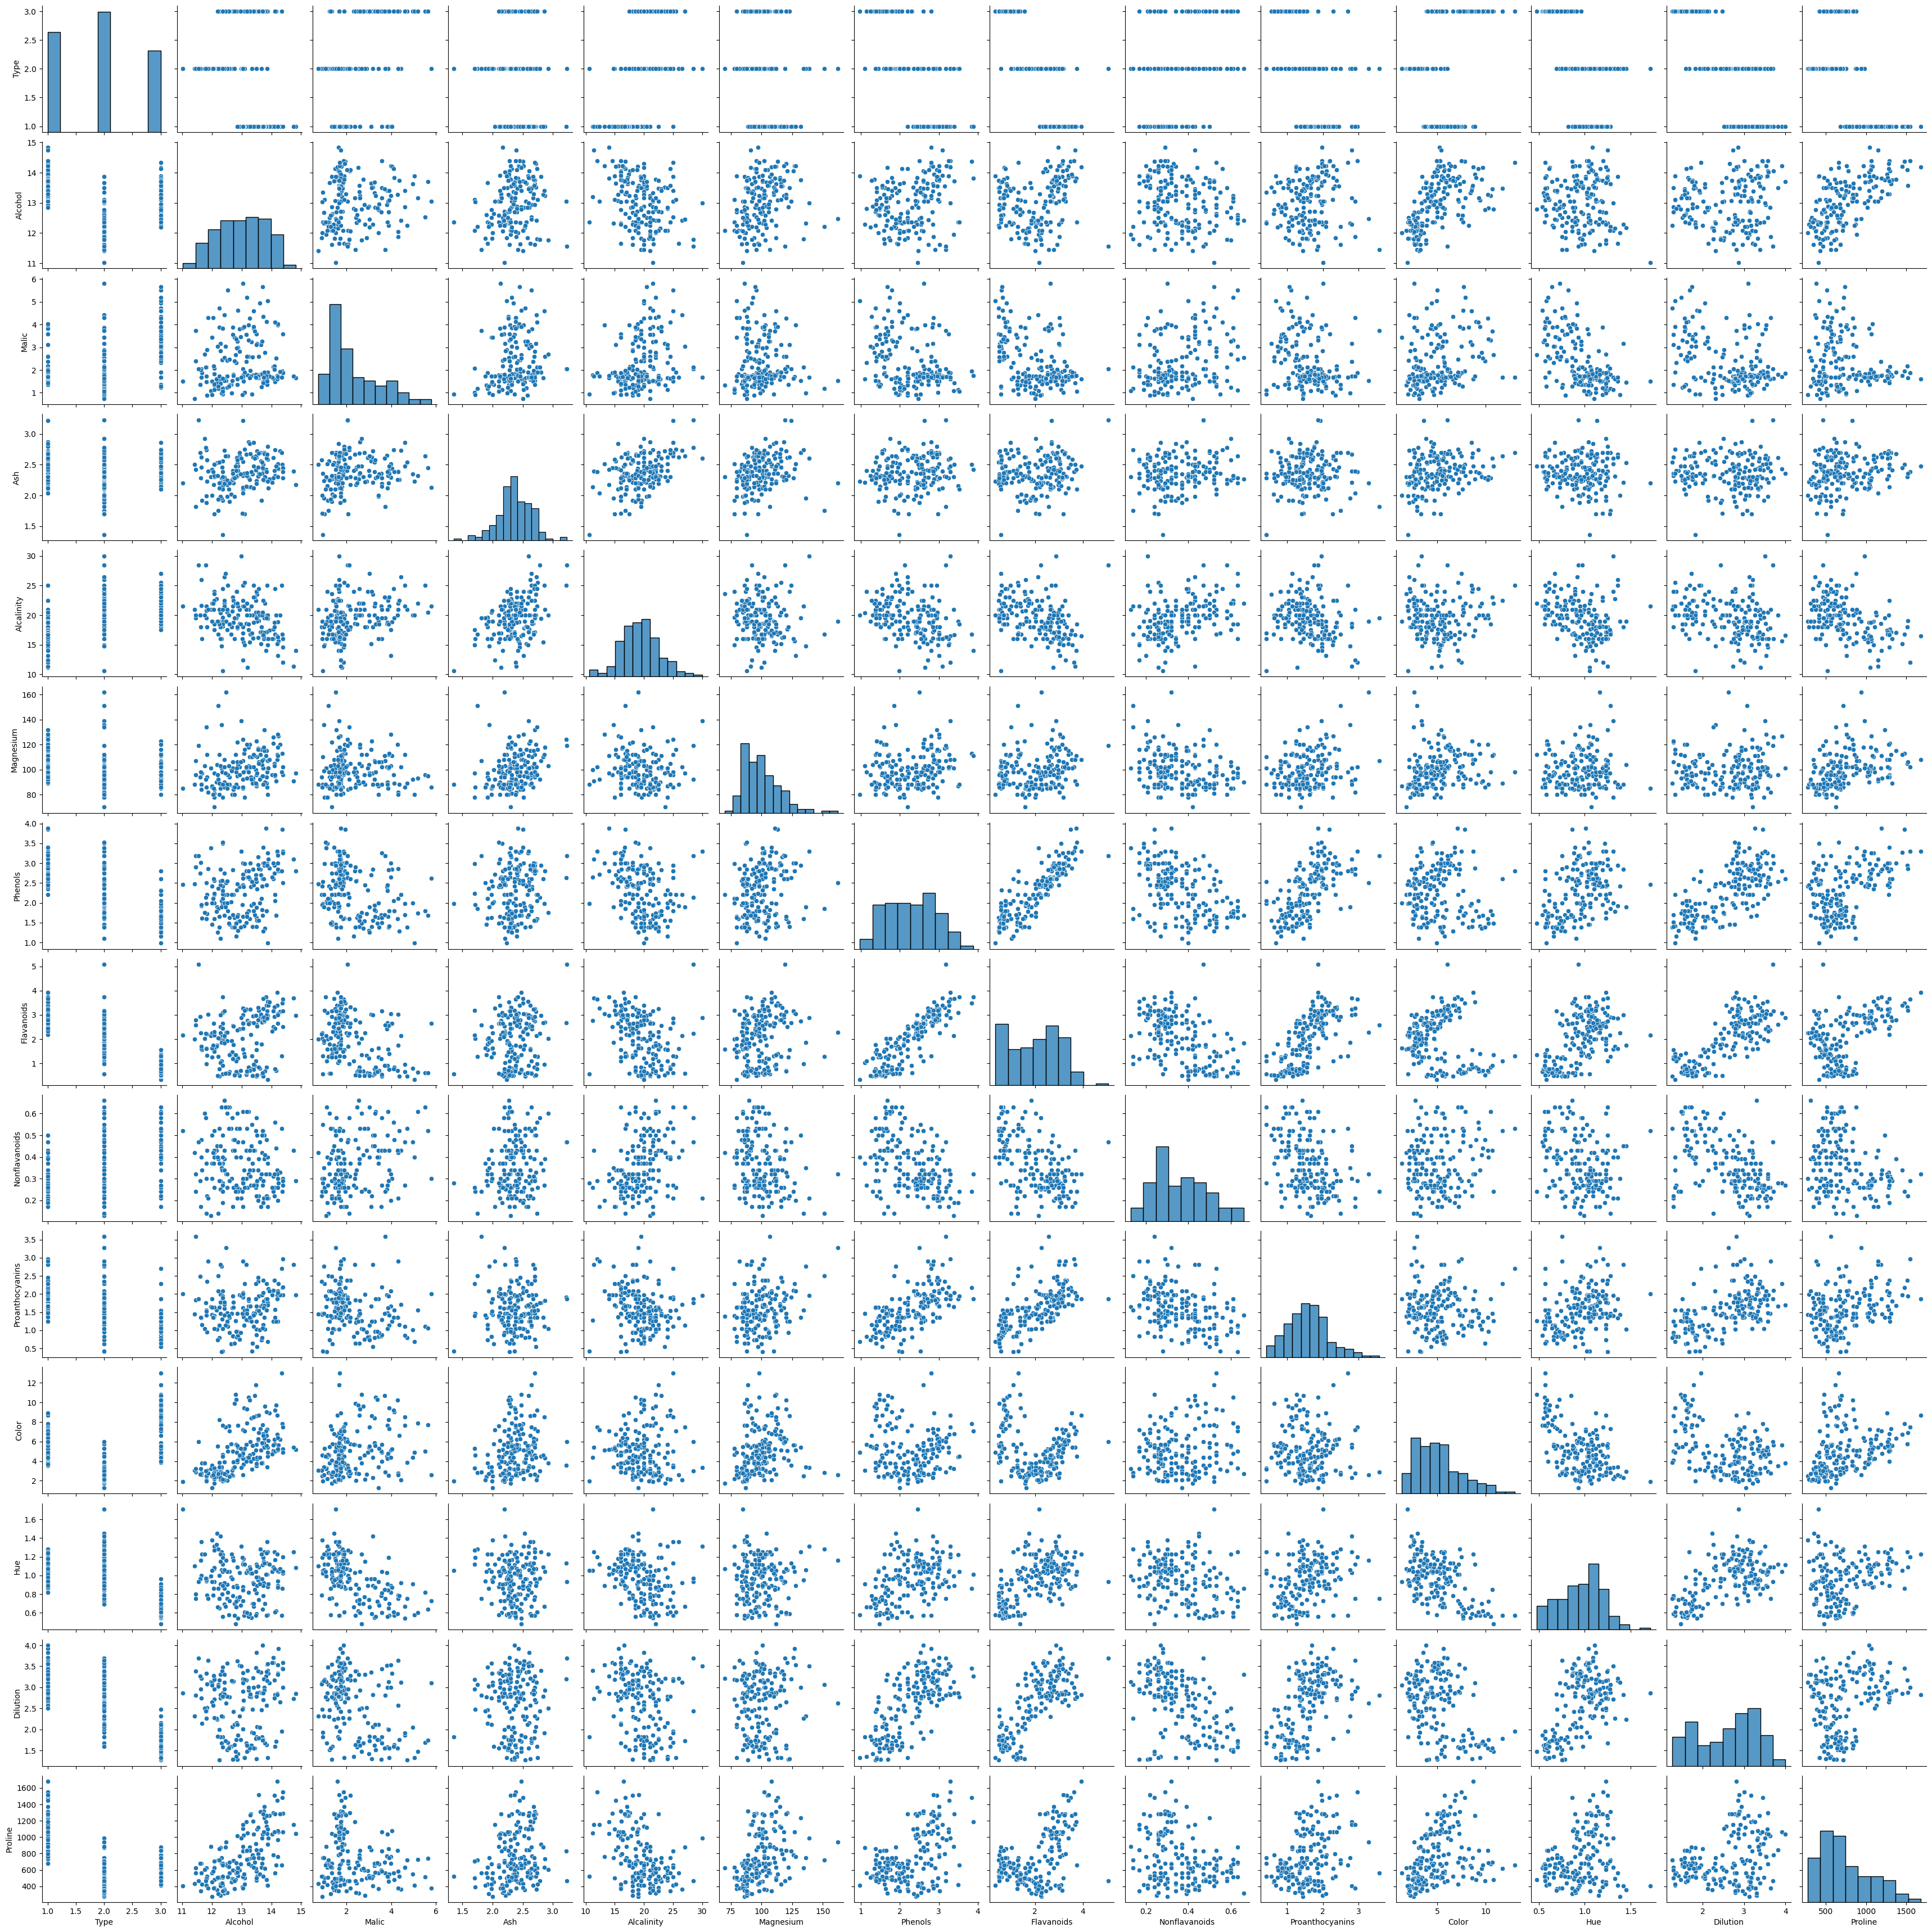

In [8]:
#creating scatterplot of numerical columns

plt.figure(figsize = (16,28),facecolor ="skyblue")
sns.pairplot(data = df)
plt.show()

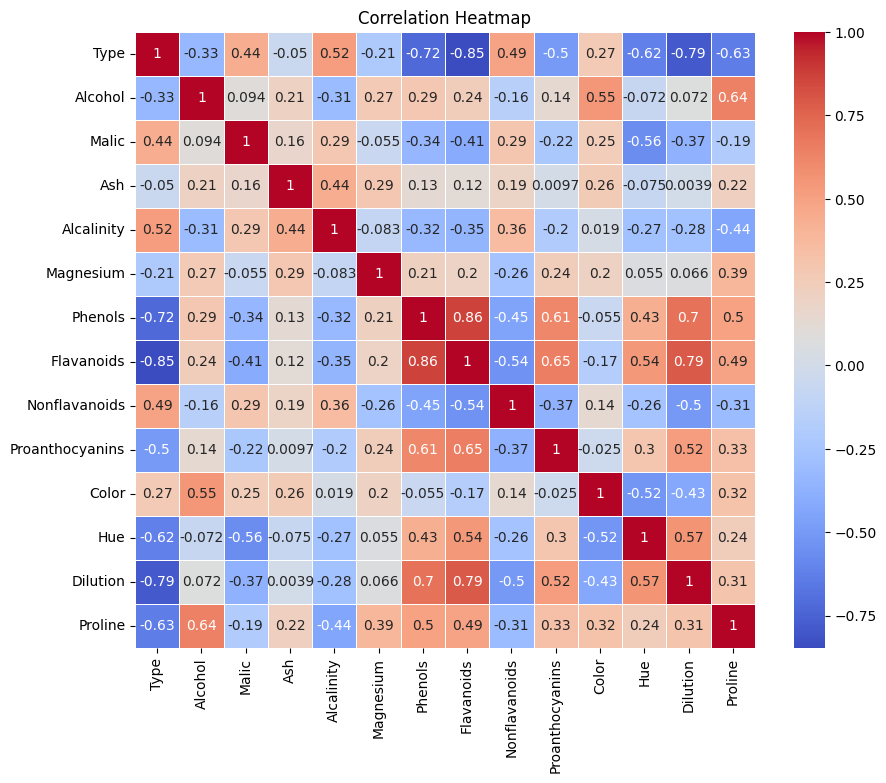

In [9]:
#correlation heatmap
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **General Observations and Insights**

#### **From Histograms**

 - Alcohol, Malic, Ash, Magnesium, Phenols, Flavanoids, Proanthocyanins, Hue, Dilution, and Proline are following a roughly normal distribution,though some are slightly skewed.

 - Alkalinity seems to exhibit two distinct peaks(Bimodal), suggesting potential sub-groups within the data.

 - Nonflavanoids right -skewed & showing a tail extending towards higher values.

 - Color appears to have a more uniform distribution with some fluctuations.

 - Non-flavanoids and Proline indicating some outliers.


#### **From Boxplots**

 - As we further look into boxplots it further confirms the distributions analysis we made in histogram plots

 - Alcohol,Ash,Flavaoids.hue are relatively symmetrical while Magnesium,Phenols,Dilutions and Proanthocyanin's are near normal distributions.

 - Boxplot clearly suggests that Alkalinity is Bimodal suggests to look further into types for similarities.

 - NonFlavanoids and Prolines does have outlier should be rectify for data errors.

#### **From Scatterplot And Heatmaps**

- Type of wine have a moderate positive correlation with Malic acid levels,Alkalinity & Nonflavanoids, as these increaeing affect in choosing the type of wine.

#### *Strong Positive Correlations*

- Phenols and Flavanoids (0.86)&Flavanoid vs Dilution shows very strong positive correlations.

- Wines with higher phenol content tend to have higher flavonoid content, and vice versa also wines with less diluted tend to have more flavour   Both are important contributors to a wine's color, flavor, and antioxidant properties.

#### *Moderate Correlation*

- Dilution and Proline (0.31) Shows a moderate positive correlation. Higher dilution might be associated with higher proline levels (amino acids lvls).

- Ash and Alcalinity (0.44) also Indicates a moderate positive correlation. This suggests a relationship between the mineral content (ash) and the alkalinity of the wine.

#### *Strong Negative Correlations*

- Proanthocyanins and Nonflavanoid Phenols (-0.37)indicates \ moderate negative correlation. higher proanthocyanin levels are associated with lower nonflavanoid phenol content suggests Proanthocyanin are considered when choose have certain flavoured wine

- Between Type and Flavanoids (-0.85) have very strong negative correlation. This suggests that certain wine types (as numerically encoded) are strongly associated with lower flavonoid content. This is a crucial insight and warrants further investigation to understand what kind of "Type" wine labelled as.

- Dilution and Nonflavanoid Phenols (-0.5) suggests A moderate to strong negative correlation. Higher dilution tends to be associated with lower nonflavanoid phenol content.

#### *Weak or No Correlations*

> Many correlations fall in the lighter color ranges, indicating weak or non linear relationships. For intance, Alcohol with Malic Acid (0.094) or Ash with Hue (-0.075).


## **Data Preprocessing**

### **Standardization**

In [10]:
#standardizing the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)
df_scaled.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## **Dimention Reduction With PCA**

In [11]:
#implementing principal component analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

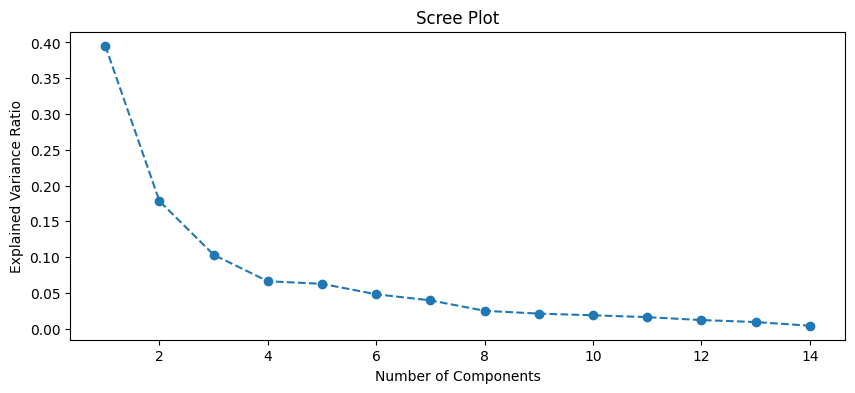

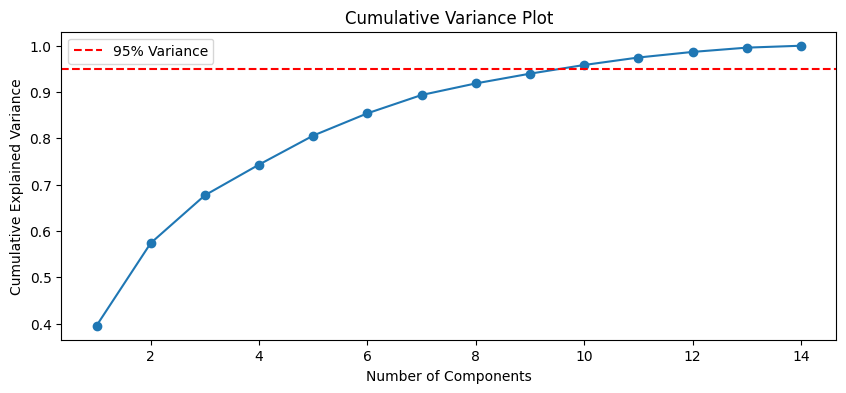

In [12]:
# Scree plot
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Plot")
plt.legend()
plt.show()


In [20]:
n_components = 8
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244]


In [21]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937


## **Clustering With Original Data**

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Cluster original data
kmeans_og = KMeans(n_clusters=3, n_init='auto', random_state=42)
og_labels = kmeans_og.fit_predict(df_scaled)
# Evaluate
silhouette_og = silhouette_score(df_scaled, og_labels)
davies_bouldin_og = davies_bouldin_score(df_scaled, og_labels)
print(f"Original Data - Silhouette: {silhouette_og:.2f}, Davies-Bouldin: {davies_bouldin_og:.2f}")

Original Data - Silhouette: 0.31, Davies-Bouldin: 1.32


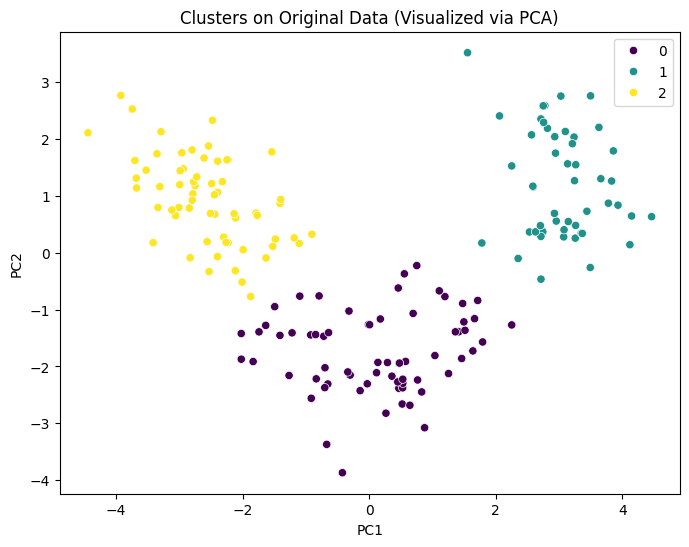

In [23]:
# Plot clusters using PCA (for visualization, even though clustering was on original data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=og_labels, palette='viridis')
plt.title("Clusters on Original Data (Visualized via PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## **Clustering With PCA Data**

In [24]:
kmeans_pca = KMeans(n_clusters=3, n_init='auto', random_state=42)
pca_labels = kmeans_pca.fit_predict(df_pca)

# Evaluate
silhouette_pca = silhouette_score(df_pca, pca_labels)
davies_bouldin_pca = davies_bouldin_score(df_pca, pca_labels)
print(f"PCA Data - Silhouette: {silhouette_pca:.2f}, Davies-Bouldin: {davies_bouldin_pca:.2f}")

PCA Data - Silhouette: 0.34, Davies-Bouldin: 1.19


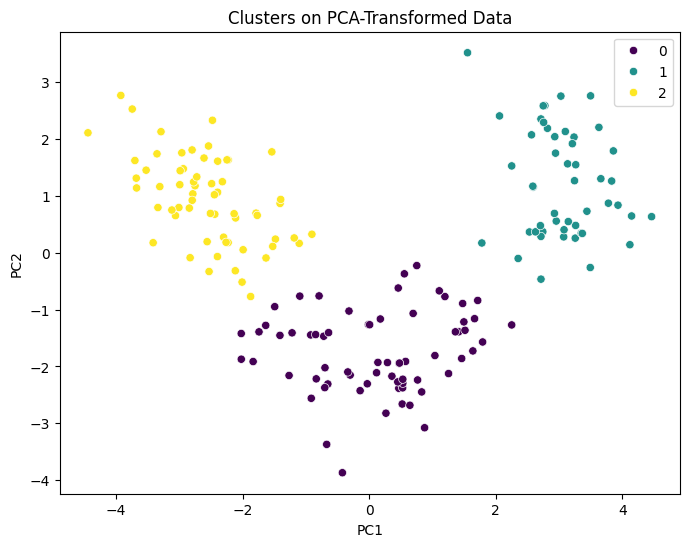

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=pca_labels, palette='viridis')
plt.title("Clusters on PCA-Transformed Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## **Comparison And Analysis**

### **Comparing Clustering Results**

In [26]:
results = pd.DataFrame({'Dataset': ['Original', 'PCA'],
                        'Silhouette Score': [silhouette_og, silhouette_pca],
                        'Davies-Bouldin Index': [davies_bouldin_og, davies_bouldin_pca]})

results

,Dataset,Silhouette Score,Davies-Bouldin Index
0,Original,0.306484,1.315708
1,PCA,0.340243,1.190304


 > **Similarities And Difference**

  **Similarities:**

 - Both the original and PCA-transformed datasets resulted in valid clustering structures.
 - The clustering method applied remains the same, so the core clustering logic is unchanged.

**Differences:**

 - The PCA-transformed dataset performed better than the original dataset in clustering.
 - Silhouette Score improved from 0.30 to 0.34, indicating more clearly well-defined clusters.
 - Davies-Bouldin Index decreased from 1.31 to 1.19, suggesting more compact and well-separated clusters.

PCA helped reduce noise and redundancy, making the clustering process more effective.

> **Impact of Dimensionality Reduction on Clustering Performance**

 PCA helps remove correlations and redundancy in data, leading to
Better-defined clusters, as seen from the improved silhouette score.
Reduced computational complexity, as fewer dimensions mean faster clustering.

**Potential Drawbacks:**

PCA reduces dimensionality at the cost of some information loss.
If important features get compressed too much, clustering might become less effective.

> **Trade-offs Between Using PCA vs. Clustering on Original Data**

 - Performance	May differ from high-dimensional noise in original data from improved PCA data due to reduced noise

 - In original data "quality of clusters Can be affected by redundant  where in PCA data cluster's quality are better when separated.

 - Computational Cost will be Higher in original due to many features while it'll lower in PCA due to fewer features.

 - Original data can be interpreted more fluently than PCA data.because of it is labelled by features.

## **Conclusion and 'Insights**

### **Key Findings & Insights**


- The dataset consists of 178 wine samples and there are 3 types of wine.

- Alcohol content,Phenolic compounds,and Proline plays crucial roles in differentiating wines .

- Alkalinity and Magnesium show high variance, which is uncommon for wines.

**Statistical Properties:**

- Alkalinity is bimodal, suggesting some sub-groups in the data set are big .

- Most variables are normally distributed, except for some skewed distributions (e.g., Malic Acid & Magnesium are right-skewed).

- Correlations indicating strong relationships between phenolic compounds, flavonoids, and wine quality.

**Clustering Performance with PCA:**

- PCA improved clustering effectiveness by increasing the silhouette score (0.34 vs. 0.31) and reducing the Davies-Bouldin Index (1.19 vs. 1.31).

- PCA helped in removing noise and redundancy, making clusters more distinct.


**Practical Implications of PCA & Clustering in Data Analysis**

- PCA helps in dimensionality reduction, making data analysis more efficient while preserving essential patterns.

- Clustering aids in identifying hidden structures, such as grouping wines based on chemical properties.
- Using PCA before clustering can improve results, as seen in this analysis, by enhancing cluster separation and reducing computation time.
- However, PCA reduces interpretability, since transformed features no longer directly correspond to the original variables.

**Recommendations for when to use each technique based on the analysis conducted.**

1. Exploratory data analysis is conducted in the initial stage of analysis
before preprocessing the data set.

 Techniques:

            - Statistical analysis.
            - Visualization.
            - Finding insights and patterns .
            - correlations between in features,etc
             
2. Data prepocessing is an impartant stage in analysis after EDA part which prepares for modeling,clustering

 Techniques:

            - Handling missing values.
            - Encoding.
            - Scaling.
            - PCA etc..

3. Clustering should be done based on the requirements of the cliets,especially if it involue interpreting features.

4. Model building and training the data set.
  
  Techniques:
              - Choosing apppropriate model.
              - Splitting the data into train and test.
              - Trains the model with machine learning algorithms.
              - Experments with parameters to improve the performance of the model.

5. Evaluates the model using the right matrices.

   Techniques:
          
             - Assesement of the model using matrices.
             - By cross validating we can see whether it fits(overfitting&underfitting).
             - Chooses best model for the data.

6. Model deployment

   Techniques:
            
             - Deploying the model.
             - Monitering the model.

7. Presenting & Communicating

 Techniques:
           
            - Presenting the insights using apprropriate visualization techniques.
            - Creating reports and documentation ,dashboards .
            - Expaining the reports in a clear way to the client.

Final Recommendations:

- If the interpretation of clusters comes first, clustering should be performed on raw or preprocessed data.
- If performance improvement is needed, PCA should be applied before clustering to reduce noise and redundancy.
- For large, complex datasets, approching with combination of PCA and clustering is often the best option.
